In this tutorial, we would like to create a toogle display, i.e., an animation that moves through different seismic images, displaying each image for a certain period of time. For the animation to work in this notebook, we need ipympl installed. First, we load all required modules:

In [1]:
%matplotlib ipympl

import numpy as np
import sys
sys.path.insert(1, '../')
import seisplot

Then we load the seismic test data to plot (for details, see tutorial #1).

In [2]:
cmpgather = np.load("data/cmp.npy")

The data set (a single CMP gather) consists of 101 traces. Let's create a second version of it and create some additional noise, simulated by random numbers. We also create the difference.

In [3]:
cmpgather_n = cmpgather.copy()
amp_max = np.max(np.abs(cmpgather["data"]))
cmpgather_n["data"] += np.random.uniform(-0.25*amp_max, 0.25*amp_max, cmpgather["data"].shape)
cmpgather_d = cmpgather_n["data"] - cmpgather["data"]

Now, let's create a toggle of these data sets. The animation should be displayed in a separate window. If this does not work, you may have to change the matplotlib setup at the beginning of this notebook.

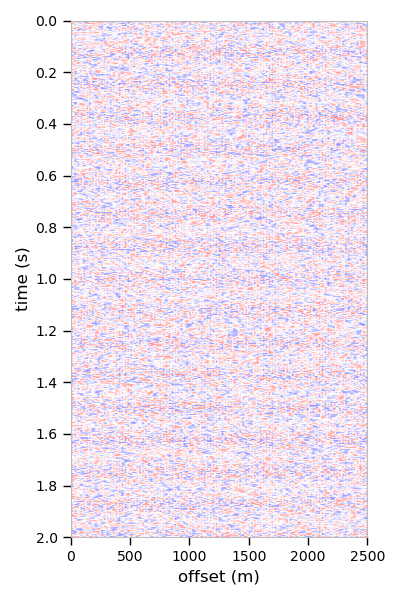

In [4]:
ani, fig, ax = seisplot.toggle([cmpgather_n, cmpgather, cmpgather_d], interval=1000,
                               width=4, height=6, haxis="offset", hlabel="offset (m)", 
                               vlabel="time (s)", vmajorticks=0.2)

The animation can be saved in different formats, for instance as animated GIF or PNG:

In [5]:
ani.save(filename="/tmp/cmpgather_toggle.gif", writer="pillow", dpi=100)

Let's see whether the file was produced correctly:

In [6]:
%%bash
ls /tmp/cmpgather_toggle.gif

/tmp/cmpgather_toggle.gif


You may have noticed that the data set `cmpgather_d` is not a Numpy structured array but a simple Numpy array. This works fine, the `toggle()` method can handle a list of data sets that contains both structured and unstructured arrays. If you would like to use a trace header mnemonic to define, for instance, the horizontal axis of the plot, as was done in this example by specifying `haxis="offset"`, then the first data set in the list must be a structured array that contains the corresponding trace header mnemonic, though.